In [3]:
import ipywidgets as wg
from IPython.display import display 
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [38]:
def fopdtPlot(K,tau,theta):
    n = 100 # time points to plot
    t = np.linspace(0,20,100) # create time vector
    # create 0 -> 1 step at t=theta
    delay = np.empty_like(t)
    for i in range(n):
        if t[i] < theta:
            delay[i] = 0.0
        else:
            delay[i] = 1.0
    # calculate response to step input
    x = K * (1.0-np.exp(-(t-theta)/tau))
    y = x * delay
    # plot response
    plt.figure(1,figsize=(15,7))
    clear_output()
    plt.subplot(1,2,1)
    plt.plot(t,y,'k-',linewidth=4,label=r'$y(t)=x(t-\theta)*S(t-\theta)$')
    plt.legend(loc='best')
    plt.ylim([-10,10])
    plt.xlim([0,20])
    plt.subplot(1,2,2)
    plt.plot(t,x,'r--',linewidth=2,label=r'$x(t-\theta)=K\;(1-\exp(-(t-\theta)/\tau))$')
    plt.plot(t,delay,'g:',linewidth=2,label=r'$S(t-\theta)$')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.ylim([-10,10])
    plt.xlim([0,20])
    plt.show()

<function __main__.fopdtPlot>

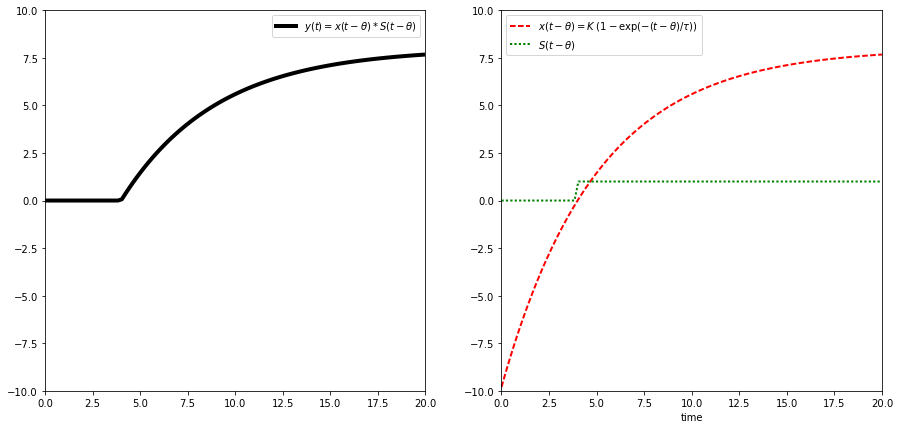

In [39]:
K_slide = wg.FloatSlider(value=8.0,min=-10.0,max=10.0,step=0.1)
tau_slide = wg.FloatSlider(value=5.0,min=0.1,max=10.0,step=0.1)
theta_slide = wg.FloatSlider(value=4.0,min=0.1,max=15.0,step=0.1)
wg.interact(fopdtPlot, K=K_slide, tau=tau_slide, theta=theta_slide)